In [ ]:
import requests
import json
import pprint
import pandas as pd
import geopandas as gpd
import os
import glob
import matplotlib.pyplot as plt
from   matplotlib.dates    import DateFormatter
from   matplotlib.pyplot   import subplots
from   matplotlib.ticker   import ScalarFormatter
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/01_Thesis_Python_Operation

/content/drive/MyDrive/01_Thesis_Python_Operation


# **Dahiti Metadata Preparation**

In [ ]:
filedir = []
path = "Data/01_Available_Virtual_Stations/01_DAHITI_Cleaned_Data"
names = os.listdir(path)
for i in names:
  x = os.path.join(path,i)
  filedir.append(x)

In [ ]:
Dahiti_DF_list = []
for i in filedir[:]:
  x = pd.read_csv(i)
  Dahiti_DF_list.append(x)

In [ ]:
# Extract minimum height along with corresponding date and error from each dataframe
min_height_data = []

for i in Dahiti_DF_list:
    min_height_row = i.loc[i['height'].idxmin()]  # Get the row with minimum height
    min_height_data.append(min_height_row[['Dahiti_ID', 'height', 'date', 'error']])

# Create a new dataframe with the extracted data
result_df = pd.DataFrame(min_height_data)

# result_df['ID'] = result_df['Dahiti_ID']
# result_df = result_df.drop('Dahiti_ID', axis=1)

result_df

,Dahiti_ID,height,date,error
18,23335,577.163,2020-04-07,0.106274
51,17705,560.337,2023-12-24,2.135323
18,17706,560.697,2020-04-07,0.220102
57,17701,490.145,2023-05-22,0.024146


In [ ]:
oldest_latest_dates = []

for df in Dahiti_DF_list:
    # Get the oldest and latest dates
    oldest_date = df['date'].min()
    latest_date = df['date'].max()

    # Append the dates to the list
    oldest_latest_dates.append({'Dahiti_ID': df['Dahiti_ID'].iloc[0], 'oldest_date': oldest_date, 'latest_date': latest_date})

# Create a new DataFrame with the extracted data
X = pd.DataFrame(oldest_latest_dates)
X

result_df = pd.merge( result_df, X, on='Dahiti_ID', how='left')
result_df

,Dahiti_ID,height,date,error,oldest_date,latest_date
0,23335,577.163,2020-04-07,0.106274,2018-12-08,2022-06-26
1,17705,560.337,2023-12-24,2.135323,2018-12-14,2023-12-24
2,17706,560.697,2020-04-07,0.220102,2018-12-08,2022-06-26
3,17701,490.145,2023-05-22,0.024146,2018-12-14,2023-08-11


In [ ]:
Dahiti_Metadata = pd.read_csv("Data/01_Available_Virtual_Stations/00_MetaData_DAHITI.csv")
# Merge the result dataframe with metadata_df
Dahiti_Metadata = pd.merge(Dahiti_Metadata, result_df, on='Dahiti_ID', how='left')

In [ ]:
Dahiti_Metadata.head()

,Unnamed: 0,Dahiti_ID,Longitude,Latitude,Surface_area,Volume,Water_level,Availability,height,date,error,oldest_date,latest_date
0,0,23335,35.3781,11.0743,None,None,2024-01-28 11:36:18,Available,577.163,2020-04-07,0.106274,2018-12-08,2022-06-26
1,1,17716,36.6598,10.3246,None,None,2024-01-28 03:37:33,Not Available,NaN,NaN,NaN,NaN,NaN
2,2,17714,36.6171,10.3628,None,None,2024-01-28 03:37:19,Not Available,NaN,NaN,NaN,NaN,NaN
3,3,17713,36.2364,10.1289,None,None,2024-01-28 03:37:06,Not Available,NaN,NaN,NaN,NaN,NaN
4,4,17711,36.0997,10.1321,None,None,2024-01-28 03:36:56,Not Available,NaN,NaN,NaN,NaN,NaN


In [ ]:
Dahiti_Metadata.columns

Index(['Unnamed: 0', 'Dahiti_ID', 'Longitude', 'Latitude', 'Surface_area',
       'Volume', 'Water_level', 'Availability', 'height', 'date', 'error',
       'oldest_date', 'latest_date'],
      dtype='object')

In [ ]:
filt = Dahiti_Metadata["Availability"] == "Available"
Dahiti_Metadata = Dahiti_Metadata.loc[filt]
Dahiti_Metadata
Dahiti_Metadata = Dahiti_Metadata[['Dahiti_ID', 'Longitude', 'Latitude', 'height', 'date', 'error', 'oldest_date', 'latest_date']]
Dahiti_Metadata

,Dahiti_ID,Longitude,Latitude,height,date,error,oldest_date,latest_date
0,23335,35.3781,11.0743,577.163,2020-04-07,0.106274,2018-12-08,2022-06-26
7,17706,35.2437,10.4862,560.697,2020-04-07,0.220102,2018-12-08,2022-06-26
8,17705,35.2109,10.5245,560.337,2023-12-24,2.135323,2018-12-14,2023-12-24
9,17701,35.0529,11.2243,490.145,2023-05-22,0.024146,2018-12-14,2023-08-11


In [ ]:
Dahiti_Metadata["ID"] = "DH_" + Dahiti_Metadata["Dahiti_ID"].astype(str)
Dahiti_Metadata = Dahiti_Metadata.drop('Dahiti_ID', axis=1)
Dahiti_Metadata

,Longitude,Latitude,height,date,error,oldest_date,latest_date,ID
0,35.3781,11.0743,577.163,2020-04-07,0.106274,2018-12-08,2022-06-26,DH_23335
7,35.2437,10.4862,560.697,2020-04-07,0.220102,2018-12-08,2022-06-26,DH_17706
8,35.2109,10.5245,560.337,2023-12-24,2.135323,2018-12-14,2023-12-24,DH_17705
9,35.0529,11.2243,490.145,2023-05-22,0.024146,2018-12-14,2023-08-11,DH_17701


# **Hydroweb Metadata Preparation**

In [ ]:
filedir = []
path = "Data/01_Available_Virtual_Stations/01_Hydroweb_Cleaned_Data"
names = os.listdir(path)
for i in names:
  x = os.path.join(path,i)
  filedir.append(x)

# filedir = filedir.sort()
# filedir

In [ ]:
Hydroweb_DF_list = []

for i in filedir[:]:
  x = pd.read_csv(i)
  Hydroweb_DF_list.append(x)

In [ ]:
# Extract minimum height along with corresponding date and error from each dataframe
min_height_data = []

for i in Hydroweb_DF_list:
    min_height_row = i.loc[i[' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n'].idxmin()]  # Get the row with minimum height
    min_height_data.append(min_height_row[['Hydroweb_ID', ' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n', ' DATE(YYYY-MM-DD)\n', ' ASSOCIATED UNCERTAINTY(M)\n']])

# Create a new dataframe with the extracted data
result_df = pd.DataFrame(min_height_data)
# result_df['ID'] = result_df['Dahiti_ID']
# result_df = result_df.drop('Dahiti_ID', axis=1)
result_df.head()

,Hydroweb_ID,ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n,DATE(YYYY-MM-DD)\n,ASSOCIATED UNCERTAINTY(M)\n
27,7971,389.87,2018-05-03,0.06
16,7837,548.32,2020-02-19,0.03
5,7829,390.90,2019-04-29,0.05
30,113243,386.87,2022-07-23,0.18
53,113377,745.11,2023-04-17,0.15


In [ ]:
oldest_latest_dates = []

for df in Hydroweb_DF_list:
    # Get the oldest and latest dates
    oldest_date = df[' DATE(YYYY-MM-DD)\n'].min()
    latest_date = df[' DATE(YYYY-MM-DD)\n'].max()

    # Append the dates to the list
    oldest_latest_dates.append({'Hydroweb_ID': df['Hydroweb_ID'].iloc[0], 'oldest_date': oldest_date, 'latest_date': latest_date})

# Create a new DataFrame with the extracted data
X = pd.DataFrame(oldest_latest_dates)
X

result_df = pd.merge( result_df, X, on='Hydroweb_ID', how='left')
result_df

,Hydroweb_ID,ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n,DATE(YYYY-MM-DD)\n,ASSOCIATED UNCERTAINTY(M)\n,oldest_date,latest_date
0,7971,389.87,2018-05-03,0.06,2016-04-07,2023-08-29
1,7837,548.32,2020-02-19,0.03,2018-12-14,2021-04-26
2,7829,390.90,2019-04-29,0.05,2018-12-15,2023-07-16
3,113243,386.87,2022-07-23,0.18,2021-09-28,2024-01-19
4,113377,745.11,2023-04-17,0.15,2021-09-29,2024-01-20
5,7965,387.72,2017-04-26,0.24,2016-04-13,2024-01-17
6,7893,383.18,2019-04-10,0.09,2018-12-23,2024-01-02
7,7901,489.48,2021-04-06,3.05,2019-03-12,2023-11-07
8,105227,1005.74,2023-03-06,0.15,2020-07-07,2023-12-28
9,7835,681.93,2023-03-06,0.04,2018-12-18,2023-12-28


In [ ]:
Hydroweb_Metadata = pd.read_csv("Data/01_Available_Virtual_Stations/00_MetaData_Hydroweb.csv")
Hydroweb_Metadata["Hydroweb_ID"] = Hydroweb_Metadata["#ID"]

# Merge the result dataframe with metadata_df
Hydroweb_Metadata = pd.merge(Hydroweb_Metadata, result_df, on='Hydroweb_ID', how='left')
Hydroweb_Metadata.head()

,Unnamed: 0,#BASIN,#RIVER,#ID,#TRIBUTARY OF,#APPROX. WIDTH OF REACH (m),#SURFACE OF UPSTREAM WATERSHED (km2),"#RATING CURVE PARAMETERS A,b,Zo such that Q(m3/s) = A[H(m)-Zo]^b",#REFERENCE ELLIPSOID,#REFERENCE LONGITUDE,...,#FIRST DATE IN DATASET,#LAST DATE IN DATASET,#DISTANCE MIN IN DATASET (km),#DISTANCE MAX IN DATASET (km),Hydroweb_ID,ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n,DATE(YYYY-MM-DD)\n,ASSOCIATED UNCERTAINTY(M)\n,oldest_date,latest_date
0,0,NILE,WHITE-NILE,7971,LNYL-TRIB-11,50,NaN,NaN,WGS84,30.8026,...,4083.2,4084.8,2023-08-31,2.0,7971,389.87,2018-05-03,0.06,2016-04-07,2023-08-29
1,1,NILE,BLUE-NILE,7837,LNYL-L-ZRQ,240,NaN,NaN,WGS84,35.1716,...,4013.9,4014.7,2021-04-28,2.0,7837,548.32,2020-02-19,0.03,2018-12-14,2021-04-26
2,2,NILE,WHITE-NILE,7965,LNYL-TRIB-11,100,NaN,NaN,WGS84,31.2596,...,4028.0,4030.2,2024-01-20,2.0,7965,387.72,2017-04-26,0.24,2016-04-13,2024-01-17
3,3,NILE,R-ADAR,113243,NaN,TBD,NaN,NaN,WGS84,32.4151,...,3864.4,3865.2,2024-01-21,2.0,113243,386.87,2022-07-23,0.18,2021-09-28,2024-01-19
4,4,NILE,BHAR-EL-GAZAL,7829,LNYL-L-BYD-TRIB-02,450,NaN,NaN,WGS84,30.3404,...,4142.4,4143.2,2023-07-18,2.0,7829,390.90,2019-04-29,0.05,2018-12-15,2023-07-16


In [ ]:
Hydroweb_Metadata.columns

Index(['Unnamed: 0', '#BASIN', '#RIVER', '#ID', '#TRIBUTARY OF',
       '#APPROX. WIDTH OF REACH (m)', '#SURFACE OF UPSTREAM WATERSHED (km2)',
       '#RATING CURVE PARAMETERS A,b,Zo such that Q(m3/s) = A[H(m)-Zo]^b',
       '#REFERENCE ELLIPSOID', '#REFERENCE LONGITUDE', '#REFERENCE LATITUDE',
       '#REFERENCE DISTANCE (km)', '#GEOID MODEL',
       '#GEOID ONDULATION AT REF POSITION(M.mm)', '#MISSION(S)-TRACK(S)',
       '#Bias applied for J2', '#Bias applied for S6A', '#STATUS',
       '#VALIDATION CRITERIA', '#MEAN ALTITUDE(M.mm)', '#MEAN SLOPE (mm/km)',
       '#NUMBER OF MEASUREMENTS IN DATASET', '#FIRST DATE IN DATASET',
       '#LAST DATE IN DATASET', '#DISTANCE MIN IN DATASET (km)',
       '#DISTANCE MAX IN DATASET (km)', 'Hydroweb_ID',
       ' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n',
       ' DATE(YYYY-MM-DD)\n', ' ASSOCIATED UNCERTAINTY(M)\n', 'oldest_date',
       'latest_date'],
      dtype='object')

In [ ]:
Hydroweb_Metadata = Hydroweb_Metadata[['Hydroweb_ID',
       ' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n',
       ' DATE(YYYY-MM-DD)\n', ' ASSOCIATED UNCERTAINTY(M)\n',
                   '#REFERENCE LONGITUDE', '#REFERENCE LATITUDE', 'oldest_date',
       'latest_date']]

In [ ]:
Hydroweb_Metadata.columns

Index(['Hydroweb_ID',
       ' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n',
       ' DATE(YYYY-MM-DD)\n', ' ASSOCIATED UNCERTAINTY(M)\n',
       '#REFERENCE LONGITUDE', '#REFERENCE LATITUDE', 'oldest_date',
       'latest_date'],
      dtype='object')

In [ ]:
Hydroweb_Metadata = Hydroweb_Metadata.rename(columns={
    ' ORTHOMETRIC HEIGHT (M) OF WATER SURFACE AT REFERENCE POSITION\n': 'height',
    ' DATE(YYYY-MM-DD)\n': 'date',
    ' ASSOCIATED UNCERTAINTY(M)\n': 'error',
    '#REFERENCE LONGITUDE' : "Longitude",
    '#REFERENCE LATITUDE' : "Latitude"
})

Hydroweb_Metadata["ID"] = "HW_" + Hydroweb_Metadata["Hydroweb_ID"].astype(str)
Hydroweb_Metadata = Hydroweb_Metadata.drop('Hydroweb_ID', axis=1)
Hydroweb_Metadata

,height,date,error,Longitude,Latitude,oldest_date,latest_date,ID
0,389.87,2018-05-03,0.06,30.8026,9.4561,2016-04-07,2023-08-29,HW_7971
1,548.32,2020-02-19,0.03,35.1716,10.6999,2018-12-14,2021-04-26,HW_7837
2,387.72,2017-04-26,0.24,31.2596,9.3930,2016-04-13,2024-01-17,HW_7965
3,386.87,2022-07-23,0.18,32.4151,10.3111,2021-09-28,2024-01-19,HW_113243
4,390.90,2019-04-29,0.05,30.3404,9.4609,2018-12-15,2023-07-16,HW_7829
5,745.11,2023-04-17,0.15,35.9058,11.0711,2021-09-29,2024-01-20,HW_113377
6,383.18,2019-04-10,0.09,32.5424,10.9464,2018-12-23,2024-01-02,HW_7893
7,1005.74,2023-03-06,0.15,36.3865,9.4636,2020-07-07,2023-12-28,HW_105227
8,385.54,2016-04-17,0.07,32.0879,9.8654,2016-04-17,2023-12-25,HW_7969
9,681.93,2023-03-06,0.04,36.2364,10.1284,2018-12-18,2023-12-28,HW_7835


In [ ]:
Virtual_Stations_MetaData = pd.concat([Dahiti_Metadata, Hydroweb_Metadata], ignore_index=True)
Virtual_Stations_MetaData.to_csv("Data/01_Available_Virtual_Stations/00_MetaData_All_VirtualStations.csv")

# ** Stations with are inside of the ROI**

<Axes: >

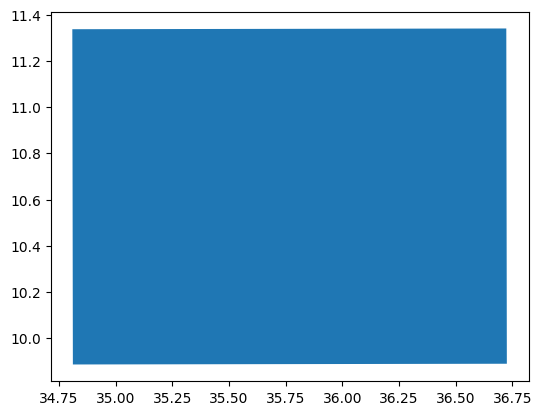

In [ ]:
#import the shapefile of the lakes
ROI = gpd.read_file('Data/00_GER_Dam_ROI/00_GER_Dam_roi.shp')
ROI.plot()

In [ ]:
# extract the data from the entire data
def filter_data_by_polygon(df, polygon_geo_df):
    df['geometry'] = gpd.points_from_xy(df['Longitude'], df['Latitude'])
    filtered_data = df[gpd.GeoDataFrame(df, geometry='geometry').within(polygon_geo_df.unary_union)]
    filtered_data = filtered_data.drop('geometry', axis=1)
    return filtered_data

In [ ]:
Virtual_Stations_ROI = filter_data_by_polygon(Virtual_Stations_MetaData, ROI)
Virtual_Stations_ROI.to_csv("Data/01_Available_Virtual_Stations/00_MetaData_ROI_VirtualStations.csv")

In [ ]:
Virtual_Stations_ROI

,Longitude,Latitude,height,date,error,oldest_date,latest_date,ID
0,35.3781,11.0743,577.163,2020-04-07,0.106274,2018-12-08,2022-06-26,DH_23335
1,35.2437,10.4862,560.697,2020-04-07,0.220102,2018-12-08,2022-06-26,DH_17706
2,35.2109,10.5245,560.337,2023-12-24,2.135323,2018-12-14,2023-12-24,DH_17705
3,35.0529,11.2243,490.145,2023-05-22,0.024146,2018-12-14,2023-08-11,DH_17701
5,35.1716,10.6999,548.320,2020-02-19,0.030000,2018-12-14,2021-04-26,HW_7837
9,35.9058,11.0711,745.110,2023-04-17,0.150000,2021-09-29,2024-01-20,HW_113377
13,36.2364,10.1284,681.930,2023-03-06,0.040000,2018-12-18,2023-12-28,HW_7835
14,34.9469,11.2376,489.480,2021-04-06,3.050000,2019-03-12,2023-11-07,HW_7901
17,36.6581,10.3259,752.250,2020-03-11,0.060000,2019-03-26,2024-01-14,HW_7831
24,35.2434,10.4864,561.660,2020-04-07,0.130000,2018-12-08,2022-06-26,HW_7836
